<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_03_Tablas_de_frecuencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Crear, visualizar e interpretar tablas de frecuencia de cien datos de personas que contienen la variable de interés edades y géneros de presonas.

# Fórmulas para calcular número de clases h

## Raiz cuadrada del valor de n

El valor de $k$ es el valor entero del cálculo para $k$ puede ser *round()* o *ceiling()*.

$$
k = \sqrt{n}
$$

## Regla de Sturges:

$$
k=1+3.322\cdot log10(n)
$$

* $\text {log10 es logaritmo de base 10}$
* n es la cantidad de datos

## Regla de Scott

$$
k={3.5\cdot S} \cdot n^{-1/3}
$$

* $S$ es la desviación estándar
* $n$ es la cantidad de datos de la muestra


## Regla de Freedman & Diaconis (FD)

$$
k = 2 \cdot RI \cdot   n ^ {-\frac{1}{3}}
$$

* $RI$ es el rango intercuartílico Q3 - Q1
* $n$ es la cantidad de datos de la muestra

## Rango de cada clase

$$
h=\frac{max(datos) - min(datos)}{k}
$$


# Desarrollo

## Cargar librerías

In [ ]:
# ! pip install stemgraphic

In [ ]:
import stemgraphic as stem
import math as math
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2024) # Semilla para generar los mismos valores aleatorios de los datos


## Crear funciones



In [ ]:
def f_raiz_n(datos):
  # Calcular el número de intervalos utilizando la regla de Sturges
  n = len(datos)
  k = np.ceil(np.sqrt(n)) # Entero mas alto
  return k

def f_regla_Sturges(datos):
  # Calcular el número de intervalos utilizando la regla de Sturges
  n = len(datos)
  k = np.ceil(1 + 3.322 * math.log10(n)) # Entero mas alto
  return k

def f_regla_Scott(datos):
  # Calcular el número de intervalos utilizando la regla de Scot
  n = len(datos)
  ds = np.std(datos) # Desviación Stándar
  k = np.ceil(3.5  * ds * (n ** (-1/3))) # Entero mas alto
  return k

def f_regla_FD(datos):
  # Calcular el número de intervalos utilizando la regla de Scot
  n = len(datos)
  RI = np.percentile(datos, 75) - np.percentile(datos,25) # Rango Intercuartíñago
  k = np.ceil(2  * RI * (n ** (-1/3))) # Entero mas alto
  return k


def f_construye_tabla_freq(k, datos):
  # Crear un histograma con pandas y obtener la tabla de frecuencia
  tabla_frecuencia = pd.cut(datos, bins=k, include_lowest=True).value_counts().reset_index()
  tabla_frecuencia.columns = ['Clase', 'Frec']

  # Ordenar la tabla de frecuencia por el intervalo
  tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')

  # Generar columnas siguientes
  tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
  tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
  tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()
  tabla_frecuencia['Frec Rel Ac'] = tabla_frecuencia['Frec Rel'].cumsum()
  tabla_frecuencia['Frec Porc Ac'] = tabla_frecuencia['Frec Porc'].cumsum()


  # Mostrar la tabla de frecuencia
  print(tabla_frecuencia)

def f_histograma (k, datos, contexto, regla):
  # Crear un histograma basado en la tabla de frecuencia
  plt.hist(datos, bins=k, color='#F2AB6D', rwidth=0.85)
  plt.title("Histograma " + contexto + " basado en la regla de "+ regla)
  plt.xlabel('Edades')
  plt.ylabel('Frecuencia')

  # Mostrar el histograma
  plt.show()

## Crear datos

In [ ]:
# Construyendo un data.frame con los datos simulando datos de
# de personas de edad y género entre Masculino y Femenino


# Crar edades con media aritmética 22 y desviación std. de 3
n = 100
edades = np.random.normal(22, 3, n)
edades = np.round(edades)
#print(edades)

# Crear una lista aleatoria de géneros (Femenino o Masculino)
generos = [np.random.choice(['Femenino', 'Masculino']) for _ in range(n)]

# print(edades)
# print(generos)

dic = {'edades': edades, 'generos': generos} # Se crea un diccionario
datos = pd.DataFrame(dic) # Crea un data.frame a partir del diccionari

datos

[27. 24. 21. 22. 25. 25. 14. 18. 23. 22. 25. 27. 17. 21. 26. 25. 21. 21.
 25. 20. 23. 26. 18. 18. 25. 19. 21. 17. 21. 24. 24. 24. 18. 21. 20. 22.
 25. 23. 22. 23. 25. 22. 24. 21. 22. 21. 24. 22. 18. 19. 21. 22. 27. 24.
 20. 25. 26. 22. 25. 18. 27. 20. 23. 18. 23. 24. 15. 22. 20. 23. 17. 28.
 22. 21. 19. 25. 27. 18. 20. 25. 23. 20. 23. 25. 19. 24. 25. 22. 20. 24.
 21. 29. 19. 23. 26. 21. 18. 19. 19. 20.]
['Femenino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'Femenino', 'Femenino', 'Femenino', 'Femenino', 'Masculino', 'Femenino', 'Femenino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Masculino', 'Femenino', 'Femenino', 'Masculino', 'Masculino', 'Femenino', 

,edades,generos
0,27.0,Femenino
1,24.0,Masculino
2,21.0,Masculino
3,22.0,Masculino
4,25.0,Femenino
...,...,...
95,21.0,Femenino
96,18.0,Masculino
97,19.0,Femenino
98,19.0,Masculino


## Datos de edades ordenados



In [ ]:
np.sort(datos['edades'])

array([14., 15., 17., 17., 17., 18., 18., 18., 18., 18., 18., 18., 18.,
       18., 19., 19., 19., 19., 19., 19., 19., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
       21., 21., 21., 21., 22., 22., 22., 22., 22., 22., 22., 22., 22.,
       22., 22., 22., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23.,
       24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 26., 26.,
       26., 26., 27., 27., 27., 27., 27., 28., 29.])

## Diagrama de tallo y hoja de los datos edades



(<Figure size 750x475 with 1 Axes>, <Axes: >)

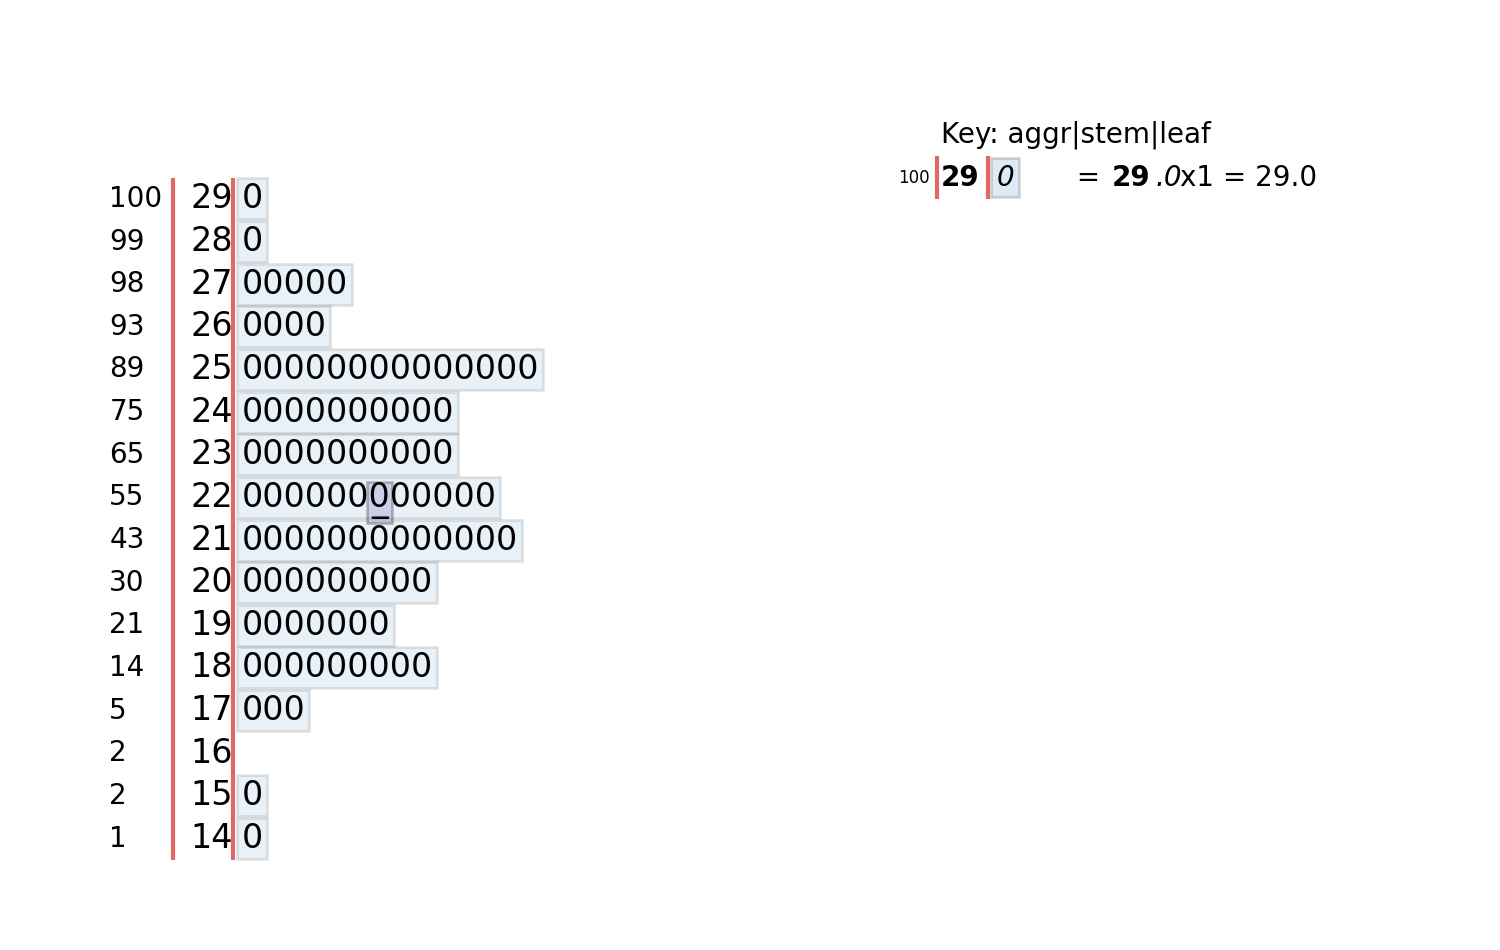

In [ ]:
# Crear el diagrama de tallo y hoja
stem.stem_graphic(datos['edades'], scale=1)

### Análisis decriptivo de los datos

Con la función *describe()* se obtienen los estadísticos de la variables numéricas de un conjunto de datos.

In [ ]:
datos.describe()

,edades
count,100.00000
mean,22.08000
std,3.00397
min,14.00000
25%,20.00000
50%,22.00000
75%,24.25000
max,29.00000


### Crear tablas de frecuencia

#### Tabla de frecuencia de la edad

La tabla de frecuencia de la edad debe agrupar datos a manera de clases de 2 en 2, es decir:
* clases:  de 18-19, de 20-21, de 22-23, de 24-25 años para determinar una tabla la frecuencia de
* clase,
* frecuecia
* frecuencia relativa,
* frecuencia porcentual,
* frecuencia acumulada
* frecuencia relativa acumulada
* frecuncia porcentual acumulada.



### Calculando número de clases con raiz de n

Se calcula el número de clases, se visualiza la tabla de frecuencias y el histograma.

Número de clases raiz de n =  10
Rango de clases =  1.5
            Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
8  (13.984, 15.5]     2      0.02        2.0        2         0.02   
7    (15.5, 17.0]     3      0.03        3.0        5         0.05   
5    (17.0, 18.5]     9      0.09        9.0       14         0.14   
2    (18.5, 20.0]    16      0.16       16.0       30         0.30   
3    (20.0, 21.5]    13      0.13       13.0       43         0.43   
0    (21.5, 23.0]    22      0.22       22.0       65         0.65   
4    (23.0, 24.5]    10      0.10       10.0       75         0.75   
1    (24.5, 26.0]    18      0.18       18.0       93         0.93   
6    (26.0, 27.5]     5      0.05        5.0       98         0.98   
9    (27.5, 29.0]     2      0.02        2.0      100         1.00   

   Frec Porc Ac  
8           2.0  
7           5.0  
5          14.0  
2          30.0  
3          43.0  
0          65.0  
4          75.0  
1          93.0  
6          

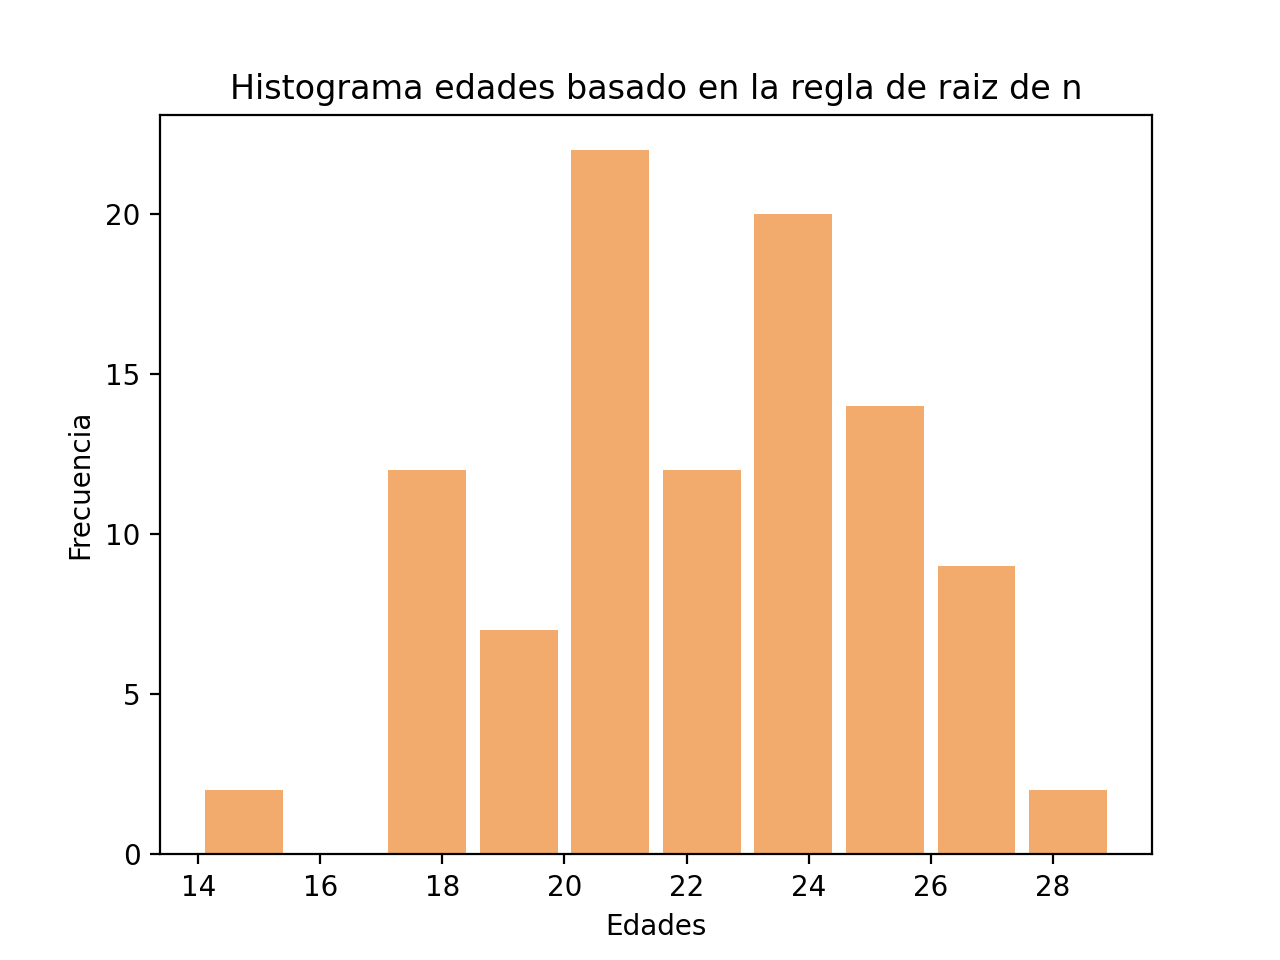

In [ ]:
k = int(f_raiz_n(datos['edades']))
print ("Número de clases raiz de n = ", k)
print ("Rango de clases = ", (np.max(datos['edades']) - np.min(datos['edades'])) / k )

f_construye_tabla_freq(k, datos['edades'])

f_histograma(k, datos['edades'], "edades", "raiz de n")


### Calculando número de clases con Sturges

Se calcula de acuerdo a Sturges, tabla de frecuencias e histograma

Número de clases Sturges =  8
Rango de clases =  1.875
              Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
6  (13.984, 15.875]     2      0.02        2.0        2         0.02   
5   (15.875, 17.75]     3      0.03        3.0        5         0.05   
3   (17.75, 19.625]    16      0.16       16.0       21         0.21   
1    (19.625, 21.5]    22      0.22       22.0       43         0.43   
2    (21.5, 23.375]    22      0.22       22.0       65         0.65   
0   (23.375, 25.25]    24      0.24       24.0       89         0.89   
4   (25.25, 27.125]     9      0.09        9.0       98         0.98   
7    (27.125, 29.0]     2      0.02        2.0      100         1.00   

   Frec Porc Ac  
6           2.0  
5           5.0  
3          21.0  
1          43.0  
2          65.0  
0          89.0  
4          98.0  
7         100.0  


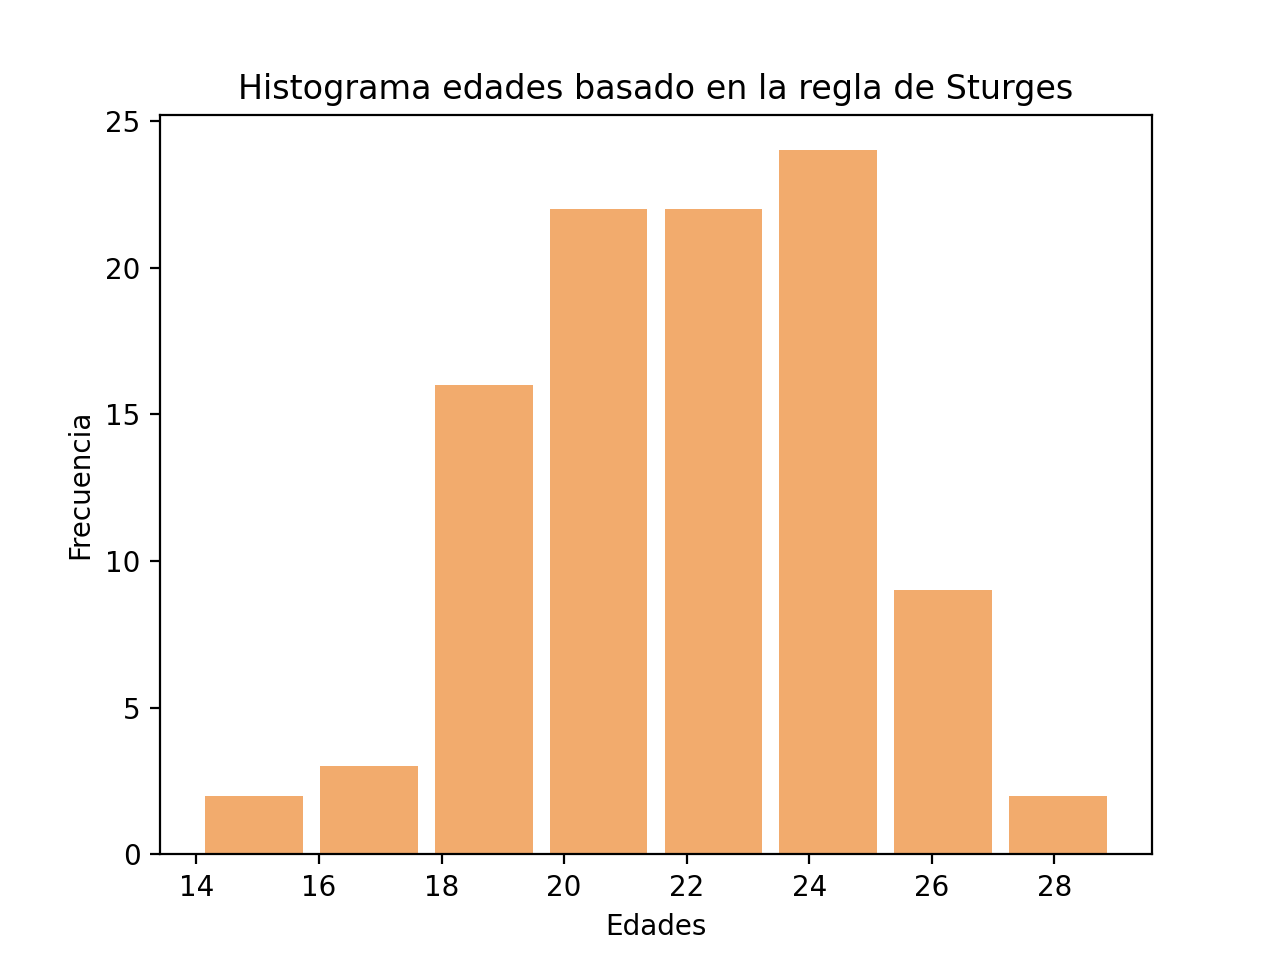

In [ ]:
k = int(f_regla_Sturges(datos['edades']))
print ("Número de clases Sturges = ", k)
print ("Rango de clases = ", (np.max(datos['edades']) - np.min(datos['edades'])) / k )

f_construye_tabla_freq(k, datos['edades'])

f_histograma(k, datos['edades'], "edades", "Sturges")

### Calculando número de clases con Scott

Se crea de igual forma número de clase $k$ con regla de Scott, se construye tabla de frecuencia y se visualzia histograma


Número de clases Scott =  3
Rango de clases =  5.0
            Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
2  (13.984, 19.0]    21      0.21       21.0       21         0.21   
0    (19.0, 24.0]    54      0.54       54.0       75         0.75   
1    (24.0, 29.0]    25      0.25       25.0      100         1.00   

   Frec Porc Ac  
2          21.0  
0          75.0  
1         100.0  


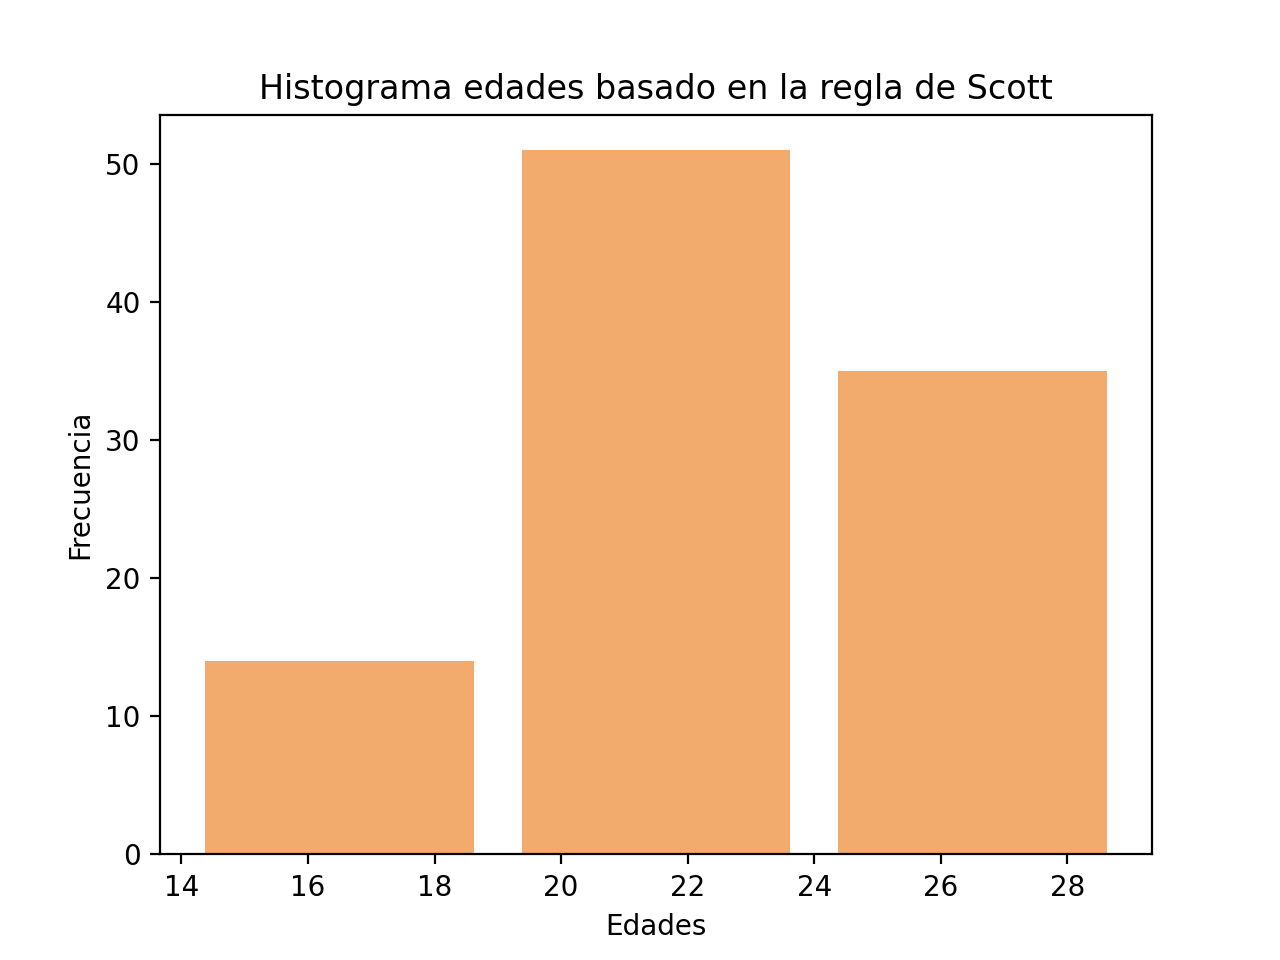

In [ ]:
k = int(f_regla_Scott(datos['edades']))
print ("Número de clases Scott = ", k)
print ("Rango de clases = ", (np.max(datos['edades']) - np.min(datos['edades'])) / k )

f_construye_tabla_freq(k, datos['edades'])

f_histograma(k, datos['edades'], "edades", "Scott")

### Regla de Freedman & Diaconis (FD)

De nuevo, se clcula el númro de clases por regla de FD, se muestra tabla de frecuencia e histograma.


Número de clases Scott =  2
Rango de clases =  7.5
            Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
1  (13.984, 21.5]    43      0.43       43.0       43         0.43   
0    (21.5, 29.0]    57      0.57       57.0      100         1.00   

   Frec Porc Ac  
1          43.0  
0         100.0  


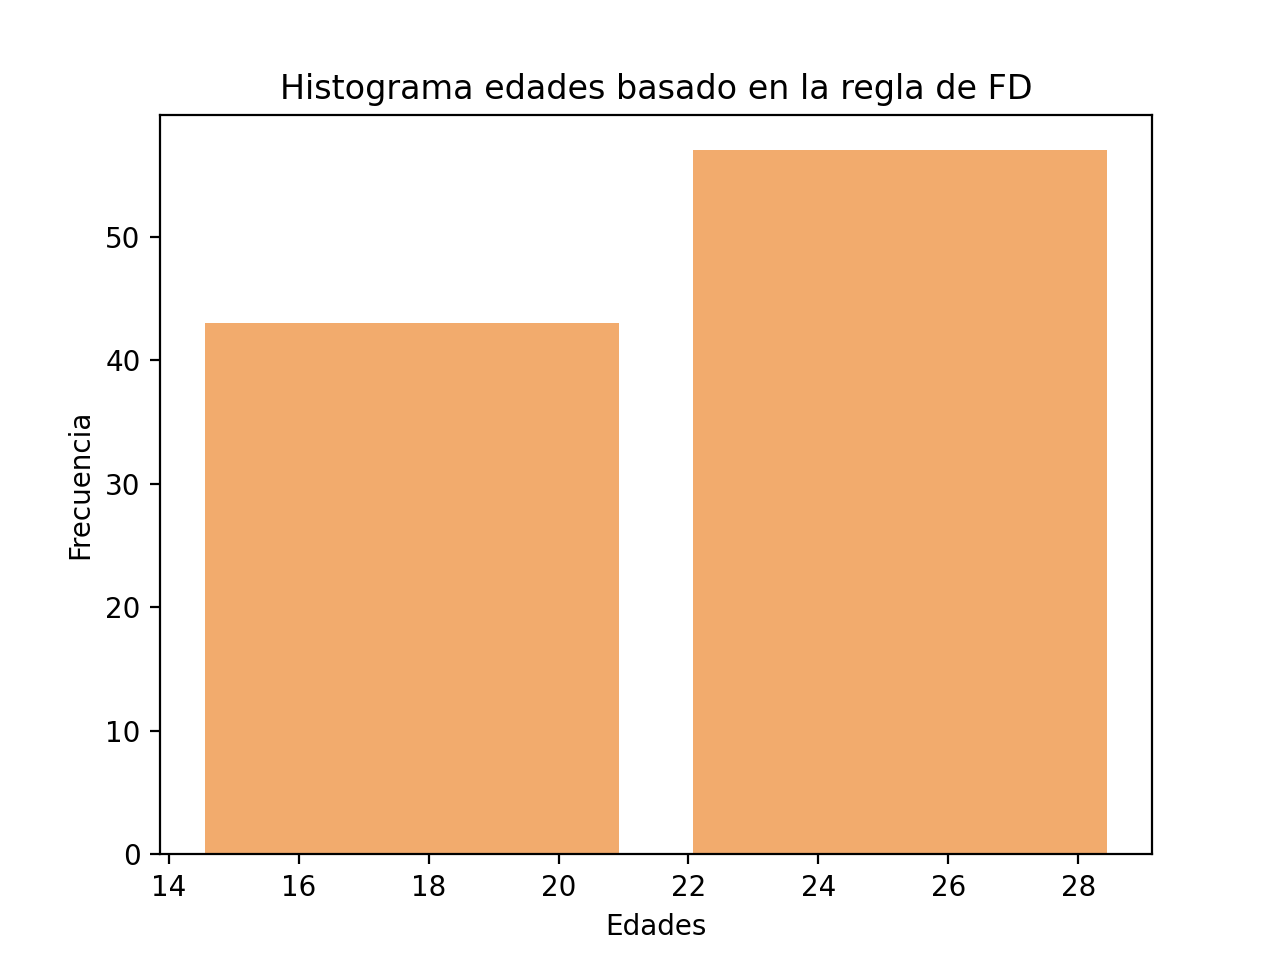

In [ ]:
k = int(f_regla_FD(datos['edades']))
print ("Número de clases Scott = ", k)
print ("Rango de clases = ", (np.max(datos['edades']) - np.min(datos['edades'])) / k )

f_construye_tabla_freq(k, datos['edades'])

f_histograma(k, datos['edades'], "edades", "FD")

### Tabla de frecuencia con número específico de clases

            Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
4  (13.984, 17.0]     5      0.05        5.0        5         0.05   
2    (17.0, 20.0]    25      0.25       25.0       30         0.30   
0    (20.0, 23.0]    35      0.35       35.0       65         0.65   
1    (23.0, 26.0]    28      0.28       28.0       93         0.93   
3    (26.0, 29.0]     7      0.07        7.0      100         1.00   

   Frec Porc Ac  
4           5.0  
2          30.0  
0          65.0  
1          93.0  
3         100.0  


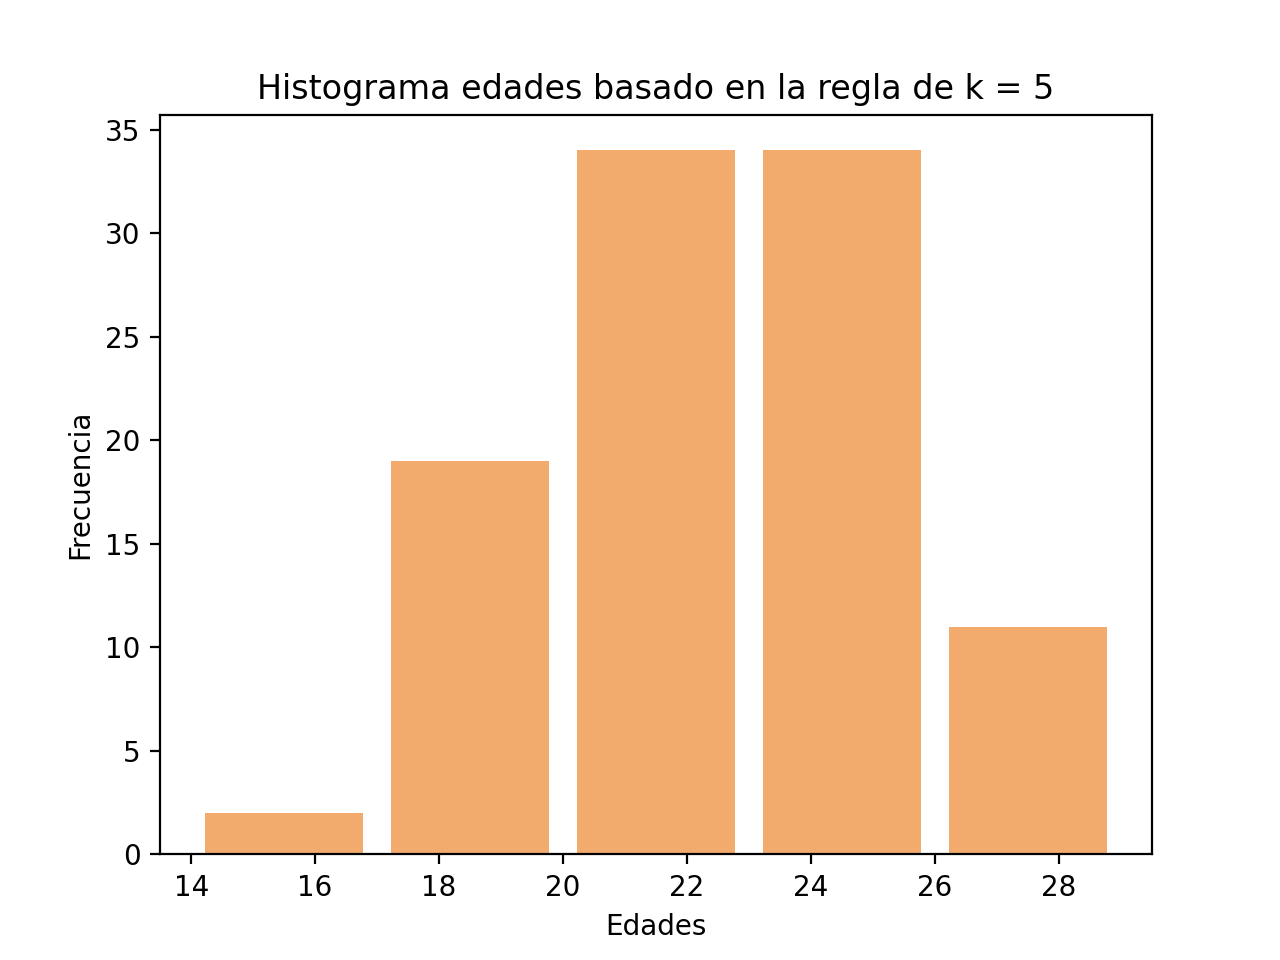

In [ ]:
k = 5 # Número de clases

f_construye_tabla_freq(k, datos['edades'])
f_histograma(k, datos['edades'], "edades", "k = 5")


## Tabla de frecuencia de género

Se visualiza tabla de frecuencia de la variable genero (Masculino o Femenino)

In [ ]:
tabla_frecuencia = datos['generos'].value_counts().reset_index()
tabla_frecuencia.columns = ['Género', 'Frecuencia']

# Mostrar la tabla de frecuencia
print(tabla_frecuencia)

      Género  Frecuencia
0  Masculino          60
1   Femenino          40


## Visualizar tabla de frecuencia


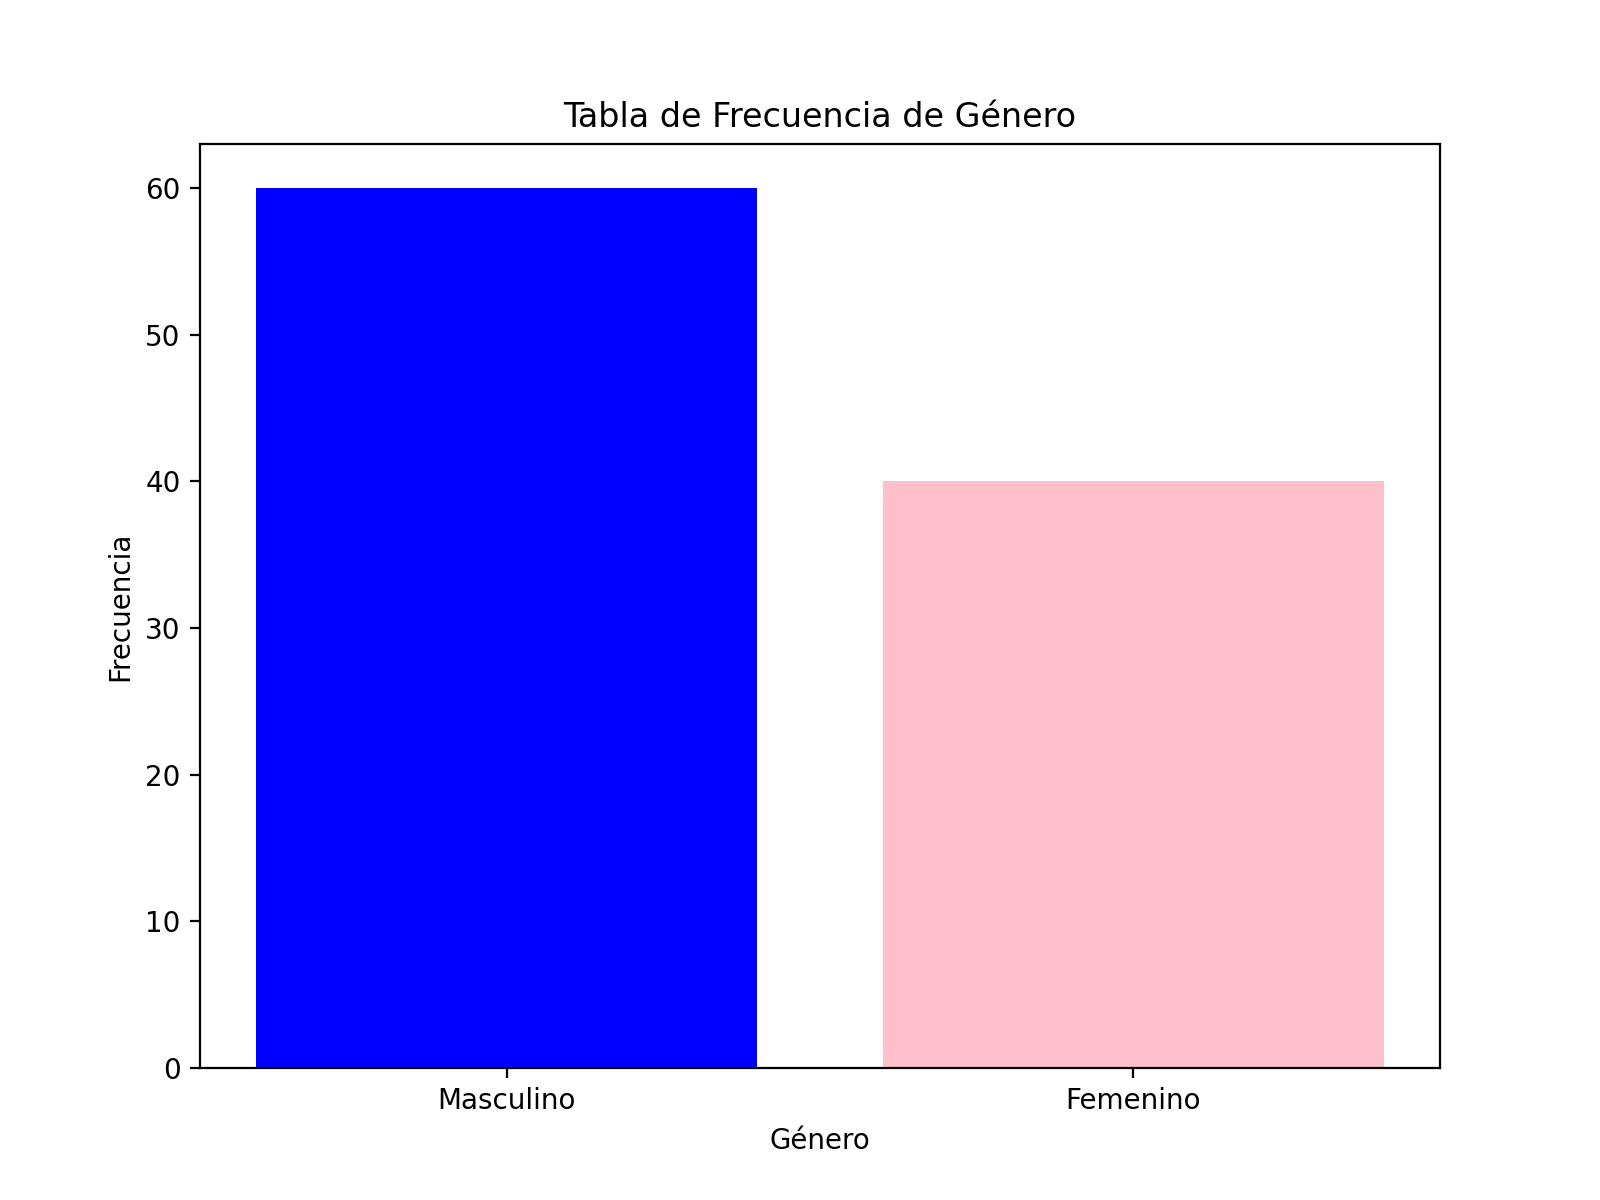

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(tabla_frecuencia['Género'], tabla_frecuencia['Frecuencia'], color=['blue', 'pink'])
plt.title('Tabla de Frecuencia de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()







## Tabla de frecuencia de género

Determinar cuantas personas hay de cada género. Código más elaborado



In [ ]:
 (datos
  .groupby("generos")
  .agg(frequency=("generos", "count")))

,frequency
generos,
Femenino,40
Masculino,60


## Visualizar tabla de frecuencia de género


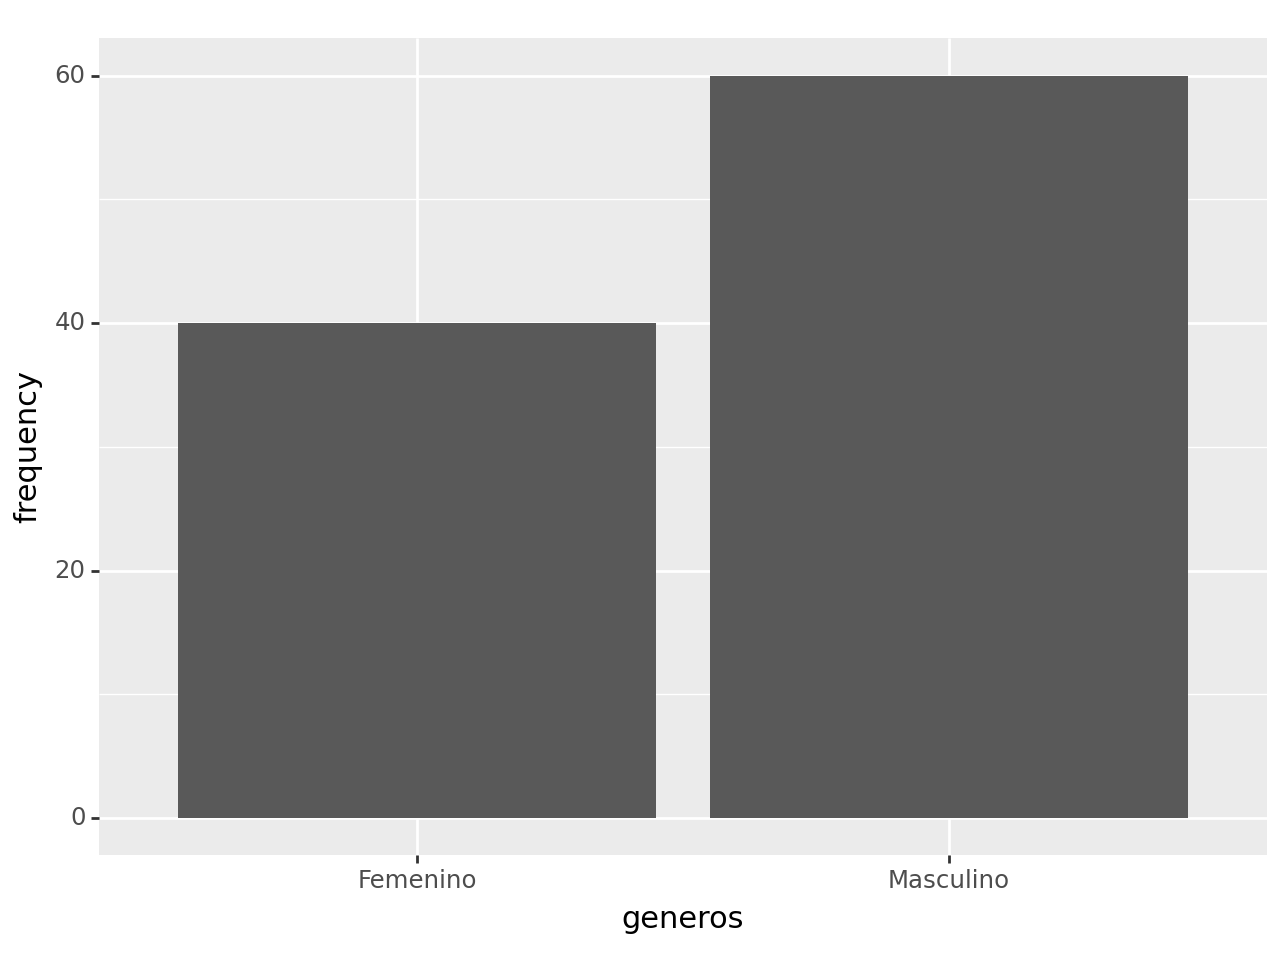

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import *

freq_by_genero = (datos
  .groupby("generos")
  .agg(frequency=("generos", "count"))
  .reset_index())

(ggplot(freq_by_genero, aes(x = "generos", y = "frequency")) +
  geom_bar(stat = 'identity'))

## Tabla cruzada

In [ ]:
tabla_cruzada = pd.crosstab(index=datos['edades'], columns=datos['generos'])

print(tabla_cruzada)

generos  Femenino  Masculino
edades                      
14.0            0          1
15.0            0          1
17.0            0          3
18.0            4          5
19.0            3          4
20.0            1          8
21.0            7          6
22.0            3          9
23.0            2          8
24.0            6          4
25.0            7          7
26.0            1          3
27.0            4          1
28.0            1          0
29.0            1          0


## Visualizar tabla cruzada



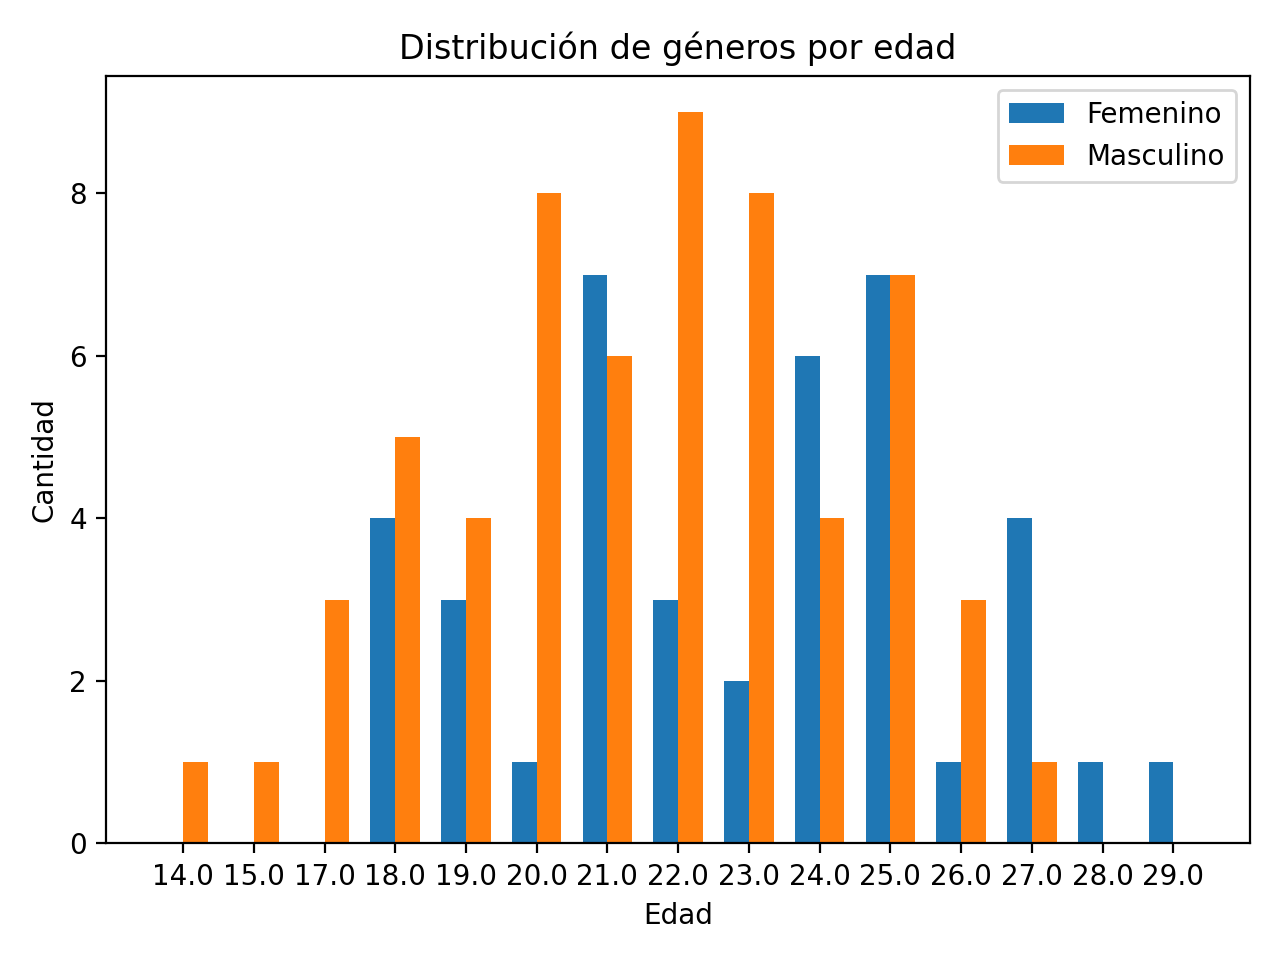

In [ ]:
# Configurar las barras
bar_width = 0.35
index = np.arange(len(tabla_cruzada))

# Crear las barras para Femenino y Masculino
plt.bar(index - bar_width/2, tabla_cruzada['Femenino'], bar_width, label='Femenino')
plt.bar(index + bar_width/2, tabla_cruzada['Masculino'], bar_width, label='Masculino')

# Añadir títulos y etiquetas
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de géneros por edad')
plt.xticks(index, tabla_cruzada.index)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Interpretación

Al menos 100 palabras a título personal

Las tablas de frecuencia representan la cantidad de ocasiones que hay de un valor con respecto al total.

Para este ejercicio hay alrededor de 40 personas del género femenino y 60 del género masculino

Con respecto a la variable edad existen alrededor de 22 personas de entre 22 a 23 años.

Hay más personas del género femenino de edades de 14, 17, 24, 27 y 28 años.

* ¿Qué representa un diagrama de tallo y hoja?
* ¿Qué representa un histograma?. Resp. para datos numéricos-
* ¿Qué representa un diagrama de barra?. Para datos categóricos.
* ¿Que es una tabla cruzada y para qué sirve o cómo se interpreta?
* ¿Se puede representar una tabla cruzada visualmente y con qué tipo de gráfica?
